In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.io.wavfile
import librosa.display
import os

In [ ]:
# Spectrogramme du signal S
s, fs = sf.read('.\speech_TRAIN_1\TIMIT_TRAIN_1\DR1\FCJF0\SA1.WAV')
f_s, t_s, Zss = signal.stft(s, fs, nperseg=1024, window='hann', noverlap = 1024 / 2);#  , window='hann', nfft= 4096, noverlap=256 avec f=16kHz et nperseg=256 : fenetre temporelle=16ms
print(f_s.shape)
print(Zss.shape)
Sdb = librosa.amplitude_to_db(abs(Zss))
Sdb_normalized= (Sdb-np.min(Sdb))/(np.max(Sdb)-np.min(Sdb))
plt.pcolormesh(t_s, f_s,Sdb_normalized,  shading='auto')
#librosa.display.specshow(Sdb, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar()

plt.title('STFT Magnitude of Sdb')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

t_new,s_new=signal.istft(Zss, fs, nperseg=1024, window='hann',noverlap =1024 / 2);
s_new = s_new [:s.shape[0]];
plt.figure();
plt.plot( s )
plt.figure();
plt.plot( s_new)
plt.figure();
plt.plot(  s - s_new)
print(s.shape,s_new.shape)
try:
    os.makedirs('signals_after_spects')
except OSError:
    pass
sf.write('signals_after_spects/ex_file.wav', s_new, fs, 'PCM_24');

In [3]:
# Ré_échantillonnage du bruit b 
b, fb = sf.read('babble.WAV')
b1=signal.resample(b,int(len(b)*fs/fb))
scipy.io.wavfile.write('bruit.wav',fs,b1)
f_b, t_b, Zbb = signal.stft(b1[0:46797], fs, nperseg=512, window='hann', noverlap=512/2)
Bdb = librosa.amplitude_to_db(abs(Zbb))
Bdb_normalized= (Bdb-np.min(Bdb))/(np.max(Bdb)-np.min(Bdb))

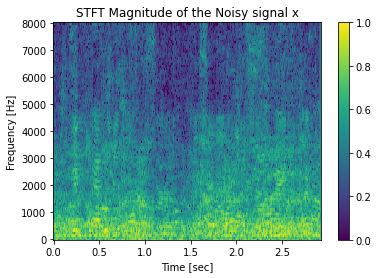

In [4]:
# Spectrogramme du signal X=S+b
alpha=0.5
x=s+alpha*b1[0:46797]
scipy.io.wavfile.write('X_bruit.wav',fs,x)
f_x, t_x, Zxx = signal.stft(x, fs, nperseg=256, window='hann', noverlap=256/2)
Xdb = librosa.amplitude_to_db(abs(Zxx))
Xdb_normalized= (Xdb-np.min(Xdb))/(np.max(Xdb)-np.min(Xdb))
plt.pcolormesh(t_x, f_x, Xdb_normalized,  shading='auto')
plt.colorbar()
plt.title('STFT Magnitude of the Noisy signal x')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
